In [2]:
import pandas as pd

In [24]:
# Cargar datos del cluster
Cluster = pd.read_csv('D:\\Dropbox\\SharedWithLuciaLIIGH\\OriginalesMetadatos\\20210127_UnificarDB\\MASTER_SampleSheet_Downloaded20210222.csv')

# Cargar datos de Ivan
ClusterIvan=pd.read_csv('D:\\Dropbox\\SharedWithLuciaLIIGH\\OriginalesMetadatos\\20210127_UnificarDB\\MASTER_SampleSheet_IVAN_210223.csv')
ClusterIvan = ClusterIvan.add_suffix("Iv") # para que se llamen diferente las columnas

# Unir los dos dataframes tomando en cuenta los nombres
merged_inCluster=pd.merge(left=Cluster, right=ClusterIvan, how='inner', left_on='ID', right_on='IDIv')


ID                          333
Seq_Date                    159
Lib_Prep_Date               159
Lib_Protocol                333
Platform                    333
                           ... 
Tiempo.de.fermentaciónIv     94
procesoIv                     0
userIv                      333
bam_sizeIv                  333
bam_fileIv                  333
Length: 62, dtype: int64


# Cuánto miden Cluster y ClusterIvan?

In [29]:
merge_in = pd.merge(left=Cluster, right=ClusterIvan, how="inner", left_on="ID", right_on="IDIv")
print("merge_in:")
print(merge_in["ID"].count())
print("Cluster")
print(Cluster["ID"].count())
print("ClusterIvan")
print(ClusterIvan["IDIv"].count())

merge_in:
333
Cluster
332
ClusterIvan
337


# Por qué en `merged_in` hay 1 elemento más que en Cluster? sugiere que alguno está repetido en ClusterIvan

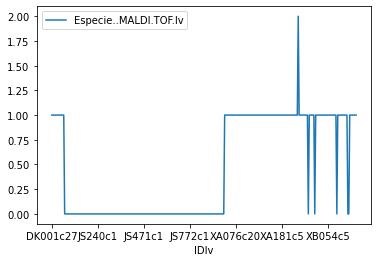

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
isinCol=ClusterIvan["IDIv"].isin(Cluster.ID)
ClusterIvan[isinCol][["IDIv","Especie..MALDI.TOF.Iv"]].groupby("IDIv").count().plot()
#plt.xticks(range(1,333), ClusterIvan["IDIv"], rotation=45)

Cuál es la duplicada? XA251c2     

In [115]:
pd.set_option('display.max_rows', None)
>>> import numpy as np
ClusterIvan[isinCol]["IDIv"].duplicated()
temp=ClusterIvan[isinCol][["IDIv","Especie..MALDI.TOF.Iv"]].groupby("IDIv").count()
#print(temp==2)
temp2=temp==2
print(temp2)

          Especie..MALDI.TOF.Iv
IDIv                           
DK001c27                  False
DK002c39                  False
DK003c30                  False
DK003c56                  False
DK016c5                   False
DK017c3                   False
DK017c4                   False
DK018c4                   False
DK019c1                   False
DK030c8                   False
DS002c10                  False
DS002c4                   False
DS002c5                   False
DS002c6                   False
JS002c1                   False
JS008c1                   False
JS014c1                   False
JS022c1                   False
JS025c1                   False
JS032c1                   False
JS033c1                   False
JS038c1                   False
JS065c1                   False
JS070c1                   False
JS080c1                   False
JS086c1                   False
JS089c1                   False
JS094c1                   False
JS098c1                   False
JS104c1 

In [119]:
print(ClusterIvan[ClusterIvan.IDIv=="XA251c2"][["IDIv","EstadoIv"]])


        IDIv   EstadoIv
272  XA251c2     Oaxaca
273  XA251c2  Michoacan


Podría ser que solo se usó la de Oaxaca y la de Michoacan en realidad solo se vino porque en algún archivo tenía el mismo nombre que la de Oaxaca?

# Cuáles están en ClusterIvan que no están en Cluster?
puras de Schacherer

In [101]:
pd.set_option('display.max_rows', None)
ClusterIvan[ ~ ClusterIvan["IDIv"].isin(Cluster.ID) ]

,IDIv,Seq_DateIv,Lib_Prep_DateIv,Lib_ProtocolIv,PlatformIv,BatchIv,ID_SeqProviderIv,PloidyIv,Geo_RegionIv,IsolationIv,...,TinaIv,PalenqueIv,AgaveIv,ObservacionesIv,ID_palenqueIv,Tiempo.de.fermentaciónIv,procesoIv,userIv,bam_sizeIv,bam_fileIv
16,JS011c1,NaN,NaN,PE102,HiSeq2000,1011_B1,CBS2910,1.0,Portugal,Human feces,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lgarcia,1.9G,JS011c1_CONC.rmdup.addgp.bam
27,JS087c1,NaN,NaN,PE102,HiSeq2000,1011_B1,SA.1.5.,2.0,Brazil,Bioethanol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lgarcia,2.1G,JS087c1_CONC.rmdup.addgp.bam
35,JS122c1,NaN,NaN,PE102,HiSeq2000,1011_B1,CLIB561,2.0,"Normandy, France","Dairy, cheese (camembert)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isedeno,20M,JS122c1_CONC.rmdup.addgp.bam
58,JS258c1,NaN,NaN,PE102,HiSeq2000,1011_B1,CBS3081,1.0,Spain,Alpechin (waste from olive oil production),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lgarcia,477M,JS258c1_CONC.rmdup.addgp.bam


# Cómo están los metadatos de Estado en `merged_inCluster`?

In [126]:
merged_inCluster.columns
merged_inCluster[["ID", "Estado", "IDIv", "EstadoIv"]]

,ID,Estado,IDIv,EstadoIv
0,DK001c27,Oaxaca,DK001c27,Oaxaca
1,DK002c39,Oaxaca,DK002c39,Oaxaca
2,DK003c30,San Luis Potosi,DK003c30,San Luis Potosi
3,DK003c56,San Luis Potosi,DK003c56,San Luis Potosi
4,DK016c5,Guerrero,DK016c5,Guerrero
5,DK017c3,Guerrero,DK017c3,Guerrero
6,DK017c4,Guerrero,DK017c4,Guerrero
7,DK018c4,Guerrero,DK018c4,Guerrero
8,DK019c1,Michoacan,DK019c1,Michoacan
9,DK030c8,Jalisco,DK030c8,Jalisco


Hay alguno diferente?

In [129]:
merged_inCluster[merged_inCluster.Estado != merged_inCluster.EstadoIv][["ID","Platform","Geo_Region","Isolation","Estado","EstadoIv","Geo_RegionIv"]]

,ID,Platform,Geo_Region,Isolation,Estado,EstadoIv,Geo_RegionIv
14,JS002c1,HiSeq2000,Italy,Wine,NaN,NaN,Italy
15,JS008c1,HiSeq2000,Northern Europe,Bakery,NaN,NaN,Northern Europe
16,JS014c1,HiSeq2000,French Guiana,Human feces,NaN,NaN,French Guiana
17,JS022c1,HiSeq2000,"Valdepenas, La Mancha, Spain",Grape must treated with sulfur dioxide,NaN,NaN,"Valdepenas, La Mancha, Spain"
18,JS025c1,HiSeq2000,Spain,Alpechin (waste from olive oil production),NaN,NaN,Spain
19,JS032c1,HiSeq2000,"Plovdiv, Bulgaria",Turbid beer,NaN,NaN,"Plovdiv, Bulgaria"
20,JS033c1,HiSeq2000,NaN,Must of Blanchard pears,NaN,NaN,NaN
21,JS038c1,HiSeq2000,"Tuchih, Nantou, Taiwan",Leaf of Acacia dealbata,NaN,NaN,"Tuchih, Nantou, Taiwan"
22,JS065c1,HiSeq2000,"South Yorkshire, UK","Brewer yeast, Yorkshire type",NaN,NaN,"South Yorkshire, UK"
23,JS070c1,HiSeq2000,"Rio de Janeiro, Tijuca National Forest, Cushva...",Fresh water,NaN,NaN,"Rio de Janeiro, Tijuca National Forest, Cushva..."


In [131]:
pd.set_option('display.max_columns', None)

merged_inCluster[merged_inCluster.IDIv=="XA251c2"]

,ID,Seq_Date,Lib_Prep_Date,Lib_Protocol,Platform,Batch,ID_SeqProvider,Ploidy,Geo_Region,Isolation,SRA,Source,Group,Posción.en.placa,ID_criovial,Especie..MALDI.TOF.,Score.Value,Especie..ITS.,Estado,Municipio,Secuenciación,Tina,Palenque,Agave,Observaciones,ID_palenque,Tiempo.de.fermentación,proceso,user,bam_size,bam_file,IDIv,Seq_DateIv,Lib_Prep_DateIv,Lib_ProtocolIv,PlatformIv,BatchIv,ID_SeqProviderIv,PloidyIv,Geo_RegionIv,IsolationIv,SRAIv,SourceIv,GroupIv,Posción.en.placaIv,ID_criovialIv,Especie..MALDI.TOF.Iv,Score.ValueIv,Especie..ITS.Iv,EstadoIv,MunicipioIv,SecuenciaciónIv,TinaIv,PalenqueIv,AgaveIv,ObservacionesIv,ID_palenqueIv,Tiempo.de.fermentaciónIv,procesoIv,userIv,bam_sizeIv,bam_fileIv
267,XA251c2,4/20/2020,Mod_MPFrance,PE150,BGI_1,CSM01-6Sep2019,01-A1,NaN,Oaxaca,Matatlán,NaN,F19FTSUSAT1473_SACxygR/Clean/XA251c2/V30005211...,BGI_1,11C02,M003-X.2,not reliable identification,1.34,-,Michoacan,"Morelia, Pino Bonito",NaN,3.0,Don Mateo,Agave cuprerata,0,2.0,0.0,NaN,lmorales,1.3G,XA251c2_CONC.rmdup.addgp.bam,XA251c2,4/20/2020,Mod_MPFrance,PE150,BGI_1,CSM01-6Sep2019,01-A1,NaN,Oaxaca,Matatlán,NaN,F19FTSUSAT1473_SACxygR/Clean/XA251c2/V30005211...,BGI_1,10A02,G002.2,Saccharomyces cerevisiae,2.01,-,Oaxaca,Santiago Matatlán,2.0,1.0,Monte lobo,Agave angustifolia,0,1.0,6.0,NaN,lmorales,1.3G,XA251c2_CONC.rmdup.addgp.bam
268,XA251c2,4/20/2020,Mod_MPFrance,PE150,BGI_1,CSM01-6Sep2019,01-A1,NaN,Oaxaca,Matatlán,NaN,F19FTSUSAT1473_SACxygR/Clean/XA251c2/V30005211...,BGI_1,11C02,M003-X.2,not reliable identification,1.34,-,Michoacan,"Morelia, Pino Bonito",NaN,3.0,Don Mateo,Agave cuprerata,0,2.0,0.0,NaN,lmorales,1.3G,XA251c2_CONC.rmdup.addgp.bam,XA251c2,4/20/2020,Mod_MPFrance,PE150,BGI_1,CSM01-6Sep2019,01-A1,NaN,Oaxaca,Matatlán,NaN,F19FTSUSAT1473_SACxygR/Clean/XA251c2/V30005211...,BGI_1,11C02,M003-X.2,not reliable identification,1.34,-,Michoacan,"Morelia, Pino Bonito",NaN,3.0,Don Mateo,Agave cuprerata,0,2.0,0.0,NaN,lmorales,1.3G,XA251c2_CONC.rmdup.addgp.bam
